# Plot word vectors
##### See [visualize.py](https://github.com/devmount/GermanWordEmbeddings/blob/master/visualize.py) script from [GermanWordEmbeddings](https://devmount.github.io/GermanWordEmbeddings/)

The following code gives an example of how to reduce dimensionality of word vectors with PCA or t-SNE.
With two dimensions left, the words can be plotted as points in a two-dimensional graph.

You need [gensim](https://radimrehurek.com/gensim/install.html), [matplotlib](http://matplotlib.org/faq/installing_faq.html#how-to-install) and [scikit-learn](http://scikit-learn.org/dev/install.html) for this script to work.

In [46]:
%matplotlib inline
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

The following function is used to compute PCA/t-SNE representation of words and returns a configured and styled plot.

In [76]:
# function draw_words
# ... reduces dimensionality of vectors of given words either with PCA or with t-SNE and draws the words into a diagram
# @param word2vec model     to visualize vectors from
# @param list     words     list of word strings to visualize
# @param bool     pca       use PCA (True) or t-SNE (False) to reduce dimensionality 
# @param bool     alternate use different color and label align for every second word
# @param bool     arrows    use arrows to connect related words (items that are next to each other in list)
# @param float    x1        x axis range (from)
# @param float    x2        x axis range (to)
# @param float    y1        y axis range (from)
# @param float    y2        y axis range (to)
# @param string   title     for diagram
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        print(point, word)
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in range(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            print(a, b, c-a, d-b)
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

Now that we have all tools to process word vectors, we need to load the `word2vec` language model that contains our high-dimensional word vectors.

In [48]:
# get trained model
# used KeyedVectors.load_word2vec_format instead of  Word2Vec.load_word2vec_format because of deprecation
model = gensim.models.KeyedVectors.load_word2vec_format("D:\\Hannes\\Dokumente\\Dokumente\\Uni\\Bachelorarbeit\\Word Embeddings\\german.model", binary=True)

In [80]:
import math

words = ["Batter", "Butter", "Obst", "Obst", "Himmels", "Himmel", "Festgottesdienst", "Gottesdienst", "Lieber", "Leber", "Kirche", "Schlauchboot"]

vectors = [model[word] for word in words]

pca = PCA(n_components=2, whiten=True)
vectors2d = pca.fit(vectors).transform(vectors)

print(vectors2d)

for i in range(0, len(words)-1, 2):
    a = vectors2d[i][0]
    b = vectors2d[i][1]
    c = vectors2d[i+1][0]
    d = vectors2d[i+1][1]
    
    print(words[i] + " - " + words[i+1])
    # print(a, b)
    print("Distanz: " + str(math.dist([a,b], [c,d])))
    print("-------------------")

[[-0.33739765  1.56408376]
 [-1.29198762 -0.92869633]
 [-1.09644112 -1.07968811]
 [-1.09644112 -1.07968811]
 [ 0.3354812   1.08599477]
 [ 0.21232223  1.06788505]
 [ 1.89152177 -1.18356727]
 [ 1.47131838 -0.81674785]
 [-0.23976215  0.53950899]
 [-0.5280551   0.00225492]
 [ 0.75514541  0.00346103]
 [-0.07570422  0.82519914]]
Batter - Butter
Distanz: 2.6693060165332367
-------------------
Obst - Obst
Distanz: 0.0
-------------------
Himmels - Himmel
Distanz: 0.1244833154158381
-------------------
Festgottesdienst - Gottesdienst
Distanz: 0.5577879368203221
-------------------
Lieber - Leber
Distanz: 0.6097169538819659
-------------------
Kirche - Schlauchboot
Distanz: 1.1685737635849018
-------------------


[-0.33739765  1.56408376] Batter
[-1.29198762 -0.92869633] Butter
[-1.09644112 -1.07968811] Obst
[-1.09644112 -1.07968811] Obst
[0.3354812  1.08599477] Himmels
[0.21232223 1.06788505] Himmel
[ 1.89152177 -1.18356727] Festgottesdienst
[ 1.47131838 -0.81674785] Gottesdienst
[-0.23976215  0.53950899] Lieber
[-0.5280551   0.00225492] Leber
[0.75514541 0.00346103] Kirche
[-0.07570422  0.82519914] Schlauchboot
-0.2973976514692742 1.564083763523626 -1.0345899692327996 -2.4927800947016285
-1.0564411239128186 -1.079688106283245 -0.08000000000000007 0.0
0.3754812033483517 1.085994770098891 -0.2031589782867078 -0.01810971795178684
1.931521769718309 -1.183567273167376 -0.500203391817138 0.3668194269223545
-0.19976214614175558 0.5395089933967533 -0.3682929515975145 -0.5372540720276548
0.7951454126066368 0.003461026431338761 -0.9108496373647372 0.8217381097587398


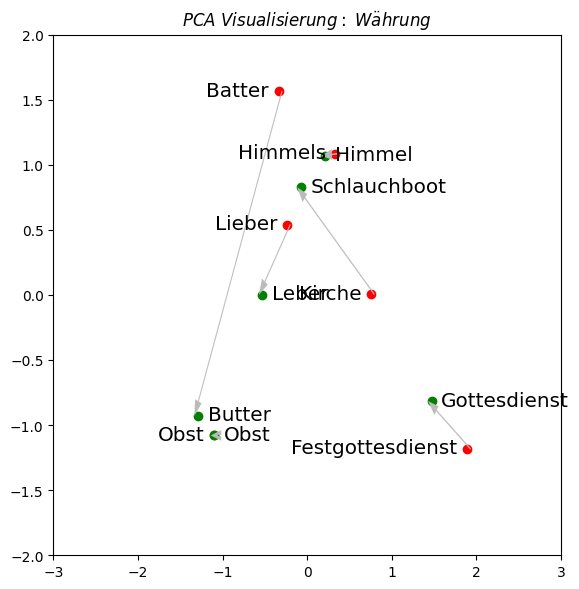

In [77]:
words = ["Batter", "Butter", "Obst", "Obst", "Himmels", "Himmel", "Festgottesdienst", "Gottesdienst", "Lieber", "Leber", "Kirche", "Schlauchboot"]
draw_words(model, words, True, True, True, -3, 3, -2, 2, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

[-0.93712412 -0.49615743] Schweiz
[ 0.42327839 -0.97638984] Franken
[-0.84321606 -0.21465969] Deutschland
[ 1.07659634 -1.24805658] Euro
[-0.91783078  0.50407807] Grossbritannien
[1.4051882  0.37643666] britische_Pfund
[-0.79851876  1.15321048] Japan
[1.20400132 2.1960762 ] Yen
[-1.07727006  0.26710332] Russland
[ 0.73369226 -0.80658477] Rubel
[-0.87118421  0.60280125] USA
[1.27643872 0.54851699] US-Dollar
[-0.99051502 -0.48147409] Kroatien
[ 0.31646379 -1.42490057] Kuna


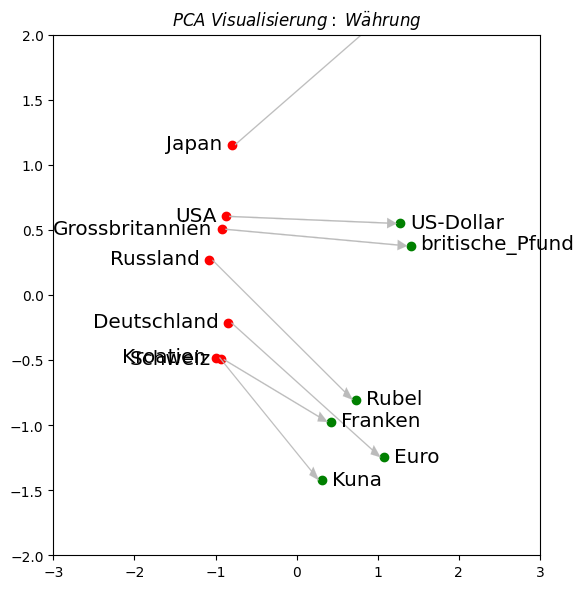

In [51]:
# plot currencies
words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","britische_Pfund","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna"]
draw_words(model, words, True, True, True, -3, 3, -2, 2, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

[0.15360112 2.25001283] Athen
[1.79362431 0.93710686] Griechenland
[-0.53190345  0.32664562] Berlin
[ 0.81561063 -0.65983556] Deutschland
[-0.72239529  1.19614251] Ankara
[ 0.61542744 -0.1352493 ] Tuerkei
[-0.0606485   0.18718291] Bern
[ 1.02916825 -0.69148565] Schweiz
[-1.65857079 -0.52664142] Hanoi
[-0.24618224 -1.61357927] Vietnam
[-0.14810671  1.59540676] Lissabon
[1.65426542 0.57156976] Portugal
[-0.91929424  0.13172632] Moskau
[ 0.3952099  -1.10415335] Russland
[-0.52235101  0.48890112] Stockholm
[ 1.1321203  -0.50151411] Schweden
[-1.73579987 -0.1468288 ] Tokio
[ 0.14238775 -1.35264715] Japan
[-1.29490277  0.14402849] Washington
[ 0.10873976 -1.0967886 ] USA


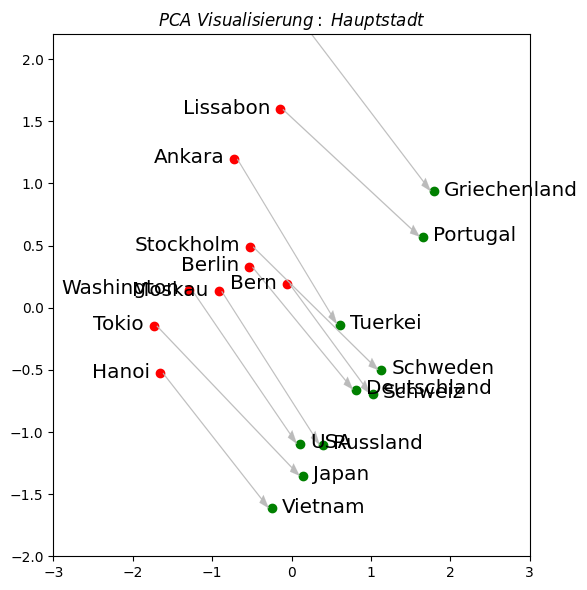

In [52]:
# plot capitals
words  = ["Athen","Griechenland","Berlin","Deutschland","Ankara","Tuerkei","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
draw_words(model, words, True, True, True, -3, 3, -2, 2.2, r'$PCA\ Visualisierung:\ Hauptstadt$')

[-0.92034971 -0.49840398] Deutschland
[ 0.71502617 -1.25811038] Deutsch
[-0.95568517 -0.60764697] USA
[ 0.7474243  -1.22313146] Englisch
[-1.05447943 -0.43835377] Frankreich
[ 0.92519697 -1.12095851] Franzoesisch
[-1.0344523  -0.43427835] Griechenland
[ 0.95936811 -0.59292138] Griechisch
[-0.9268167  1.452972 ] Norwegen
[1.10945781 1.95335468] Norwegisch
[-0.96947344  0.98952953] Schweden
[1.11570713 1.51591624] Schwedisch
[-0.89200472  0.14018998] Polen
[0.95204782 0.25687744] Polnisch
[-0.93630671  0.02181752] Ungarn
[ 1.16533988 -0.15685259] Ungarisch


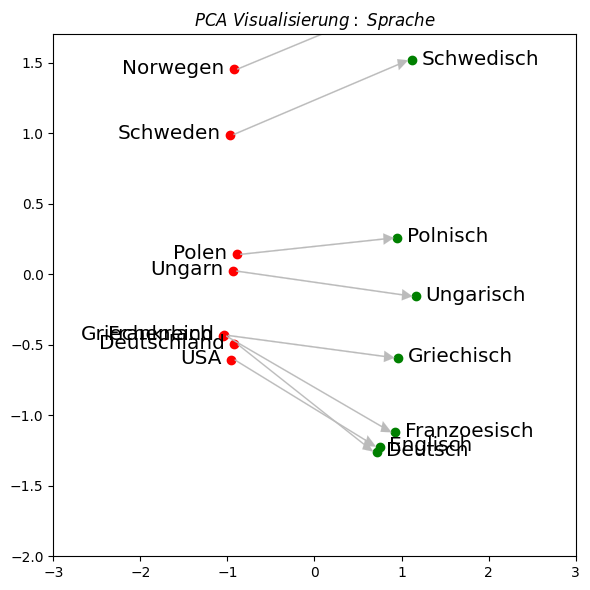

In [53]:
# plot language
words = ["Deutschland","Deutsch","USA","Englisch","Frankreich","Franzoesisch","Griechenland","Griechisch","Norwegen","Norwegisch","Schweden","Schwedisch","Polen","Polnisch","Ungarn","Ungarisch"]
draw_words(model, words, True, True, True, -3, 3, -2, 1.7, r'$PCA\ Visualisierung:\ Sprache$')

The next example shows related words to a given word, using the `most_similar()` function of gensim.

[-0.43892427 -1.05705746] Wohnhaus
[1.49669987 0.49450849] Wohnung
[-0.51482196 -0.11194088] Anwesen
[-1.17450838  0.63996991] Gebaeude
[-0.73040164  1.73447368] Hauses
[ 0.79942507 -1.03947801] Reihenhaus
[-0.13037209  0.64477852] Nachbarhaus
[1.76733969 0.33350869] Appartement
[-0.40981481 -0.02649251] Hinterhof
[-0.6646215  -1.61227042] Gartenhaus


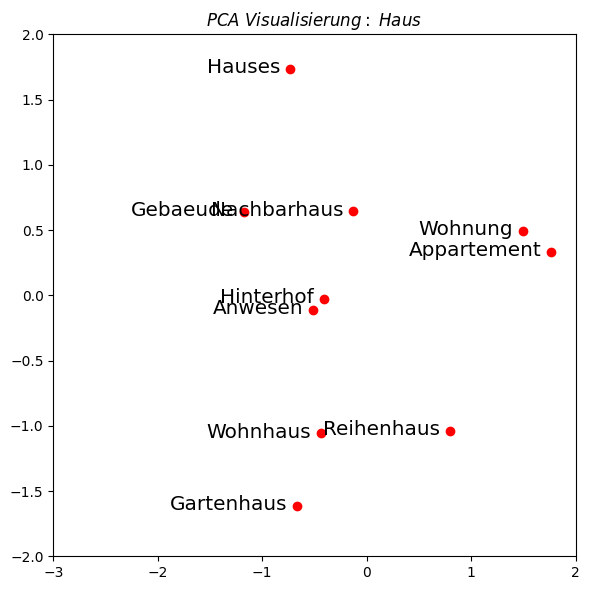

In [54]:
# plot related words to 'house'
matches = model.most_similar(positive=["Haus"], negative=[], topn=10)
words = [match[0] for match in matches]
draw_words(model, words, True, False, False, -3, 2, -2, 2, r'$PCA\ Visualisierung:\ Haus$')

Finally an example for capturing correct gender of given name.

[-0.84670359 -1.32917146] Alina
[0.9603122  0.19844482] Aaron
[-1.0288898   0.38852993] Charlotte
[0.85782932 1.77180074] Ben
[-0.92458873  0.65646264] Emily
[0.82114919 0.01515254] Elias
[-0.88051222  1.71193673] Fiona
[ 1.12769866 -0.77318756] Felix
[-0.86009599 -0.88270786] Johanna
[1.22031048 0.83018577] Joel
[-1.08083308 -0.92889734] Lara
[ 1.31840622 -1.26010105] Julian
[-0.97290383 -1.23795971] Lea
[ 0.94541921 -0.04692286] Linus
[-1.08273222 -0.25981653] Lina
[ 1.12427945 -1.12744014] Lukas
[-0.95992941  1.84797947] Mia
[0.45043904 0.56362797] Mika
[-0.83611967 -0.6151473 ] Sarah
[0.63916951 0.93968759] Noah
[-1.07895745 -0.07239578] Sophie
[ 1.08725272 -0.39006059] Simon


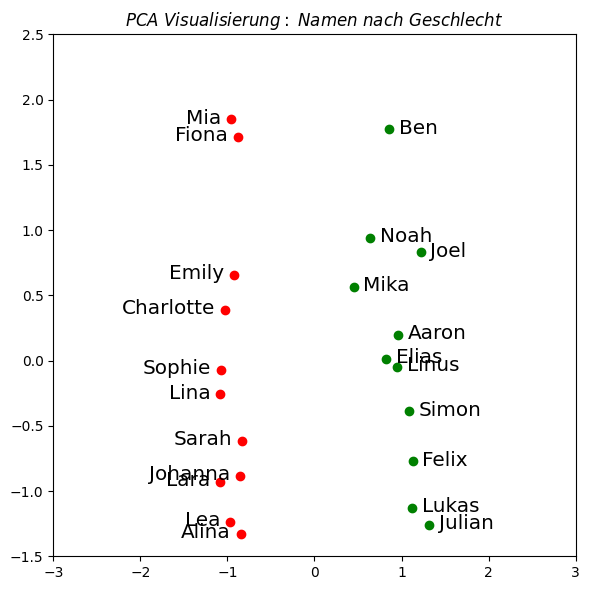

In [55]:
# plot name
words = ["Alina","Aaron","Charlotte","Ben","Emily","Elias","Fiona","Felix","Johanna","Joel","Lara","Julian","Lea","Linus","Lina","Lukas","Mia","Mika","Sarah","Noah","Sophie","Simon"]
draw_words(model, words, True, True, False, -3, 3, -1.5, 2.5, r'$PCA\ Visualisierung:\ Namen\ nach\ Geschlecht$')